In [1]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

生成数据


In [2]:
def synthetic_data(w, b, num_examples):  #@save
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

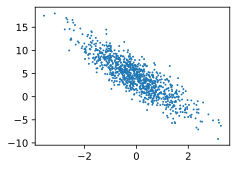

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

In [4]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices] #yield相当于return，下次调用时从中断点继续运行
        # 返回tensor[list[i]]

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0275,  0.4822],
        [ 1.3633, -0.9886],
        [ 0.3014,  0.7416],
        [ 1.1856, -0.0383],
        [ 0.2729,  1.0831],
        [ 1.7602, -2.4344],
        [ 0.0262,  0.0444],
        [ 1.4091, -0.4942],
        [-0.2695, -0.5154],
        [ 1.1774, -0.2927]]) 
 tensor([[ 4.6143],
        [10.2982],
        [ 2.2966],
        [ 6.6860],
        [ 1.0562],
        [16.0022],
        [ 4.0988],
        [ 8.7106],
        [ 5.4149],
        [ 7.5467]])


In [7]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w,b

(tensor([[-3.0091e-03],
         [-7.4514e-05]], requires_grad=True),
 tensor([0.], requires_grad=True))

模型

In [8]:
def linreg(X, w, b):  #@save
    """线性回归模型"""
    return torch.matmul(X, w) + b

损失函数

In [9]:
def squared_loss(y_hat, y):  #@save
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2 #正常应该是同样的shape，但以防一个是行向量、一个是列向量

优化器

In [10]:
def sgd(params, lr, batch_size):  #@save
    """小批量随机梯度下降"""
    with torch.no_grad(): #装饰的代码段不会应用autograd方法
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [11]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # X和y的小批量损失
        # 因为l形状是(batch_size,1)，而不是一个标量。l中的所有元素被加到一起，
        # 并以此计算关于[w,b]的梯度
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.028837
epoch 2, loss 0.000105
epoch 3, loss 0.000050


In [13]:
w,b

(tensor([[ 1.9999],
         [-3.4001]], requires_grad=True),
 tensor([4.1989], requires_grad=True))